In [1]:
import pandas as pd
import seaborn as sns
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
from dython.nominal import identify_nominal_columns
from scipy import stats
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import mca
import prince

In [2]:
sleep = pd.read_csv("original_data/sleep.csv")
activity = pd.read_csv("original_data/activity.csv")

In [3]:
# sleep_activity = pd.merge(sleep, activity, left_on=['egoid', 'dataDate'], right_on=['egoid', 'datadate'] )
# sleep_activity.to_csv('merged_data/sleep_activity.csv', index=False)

sleep_activity = pd.read_csv('merged_data/sleep_activity.csv')

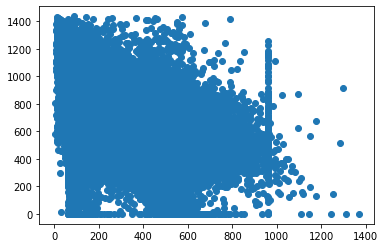

In [7]:
x = sleep_activity.bedtimedur
y = sleep_activity.sedentaryminutes

plt.scatter(x, y)

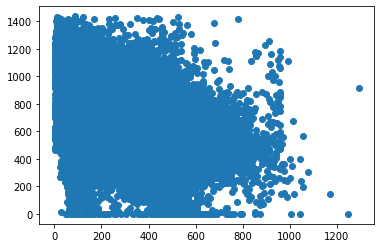

In [14]:
x = sleep_activity.minsasleep
y = sleep_activity.sedentaryminutes

plt.scatter(x, y)

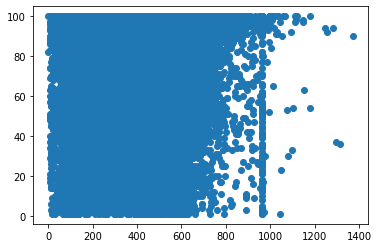

In [8]:
x = sleep_activity.bedtimedur
y = sleep_activity.complypercent

plt.scatter(x, y)

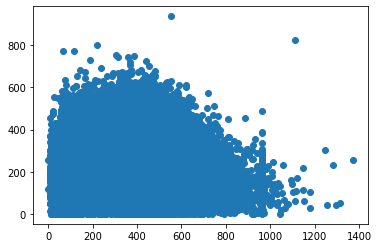

In [11]:
x = sleep_activity.bedtimedur
y = sleep_activity.lightlyactiveminutes

plt.scatter(x, y)

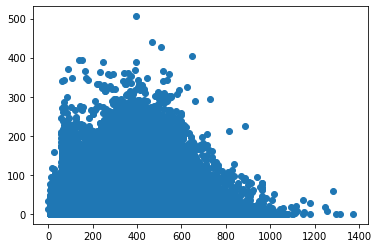

In [9]:
x = sleep_activity.bedtimedur
y = sleep_activity.fairlyactiveminutes

plt.scatter(x, y)

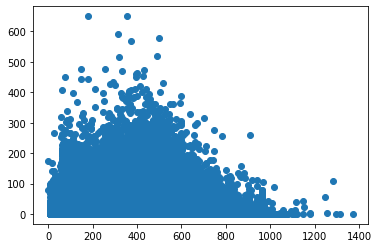

In [12]:
x = sleep_activity.bedtimedur
y = sleep_activity.veryactiveminutes

plt.scatter(x, y)

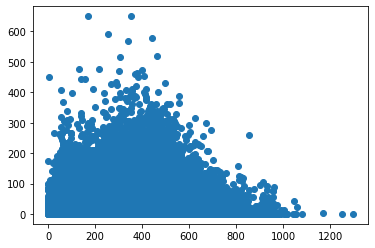

In [13]:
x = sleep_activity.minsasleep
y = sleep_activity.veryactiveminutes

plt.scatter(x, y)

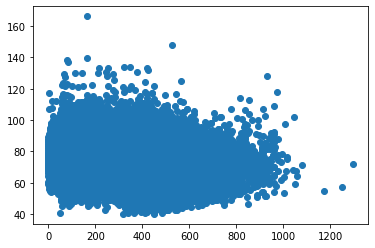

In [15]:
x = sleep_activity.minsasleep
y = sleep_activity.meanrate

plt.scatter(x, y)

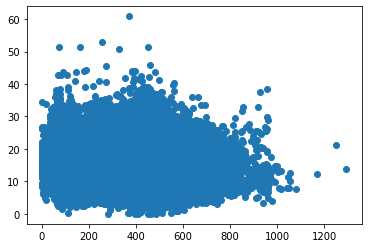

In [16]:
x = sleep_activity.minsasleep
y = sleep_activity.sdrate

plt.scatter(x, y)

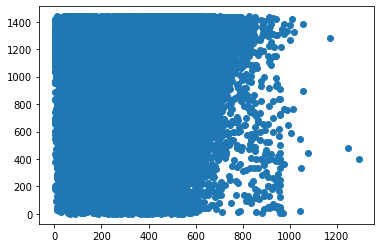

In [18]:
x = sleep_activity.minsasleep
y = sleep_activity.lowrangemins

plt.scatter(x, y)

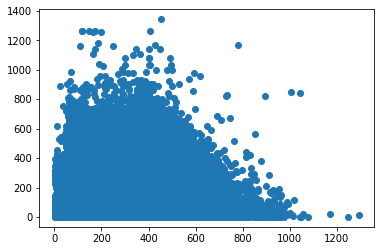

In [19]:
x = sleep_activity.minsasleep
y = sleep_activity.fatburnmins

plt.scatter(x, y)

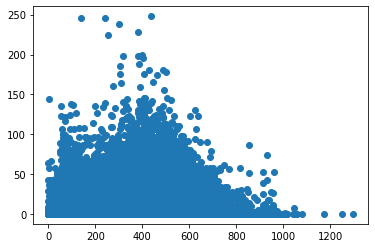

In [17]:
x = sleep_activity.minsasleep
y = sleep_activity.cardiomins

plt.scatter(x, y)

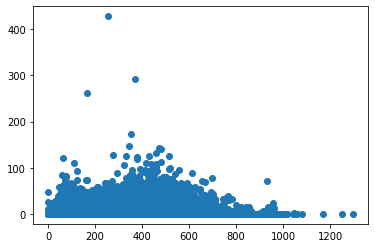

In [20]:
x = sleep_activity.minsasleep
y = sleep_activity.peakmins

plt.scatter(x, y)

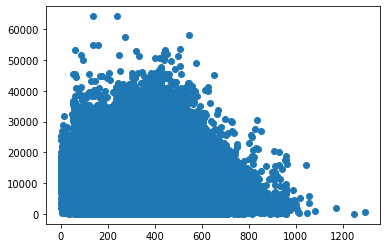

In [22]:
x = sleep_activity.minsasleep
y = sleep_activity.steps

plt.scatter(x, y)

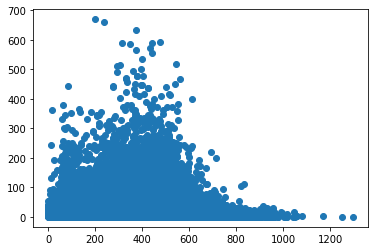

In [23]:
x = sleep_activity.minsasleep
y = sleep_activity.floors

plt.scatter(x, y)

<AxesSubplot:>

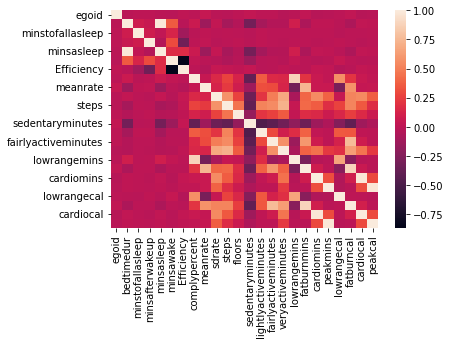

In [4]:
sns.heatmap(sleep_activity.corr())

<AxesSubplot:>

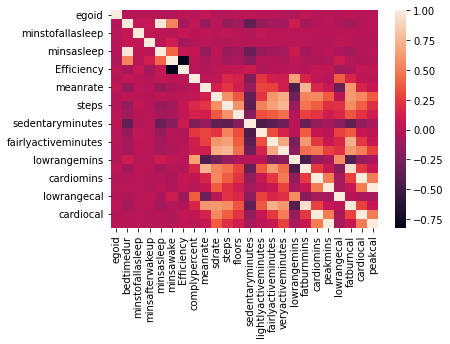

In [5]:
sns.heatmap(sleep_activity.corr(method='spearman'))

C:\Users\Eren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

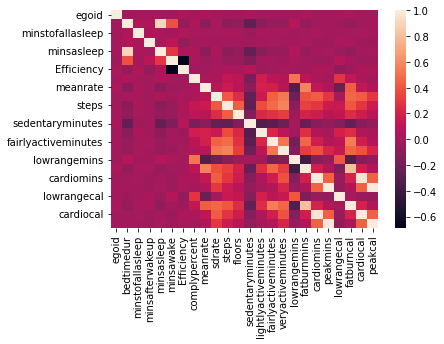

In [6]:
sns.heatmap(sleep_activity.corr(method='kendall'))

0.22106229780721642


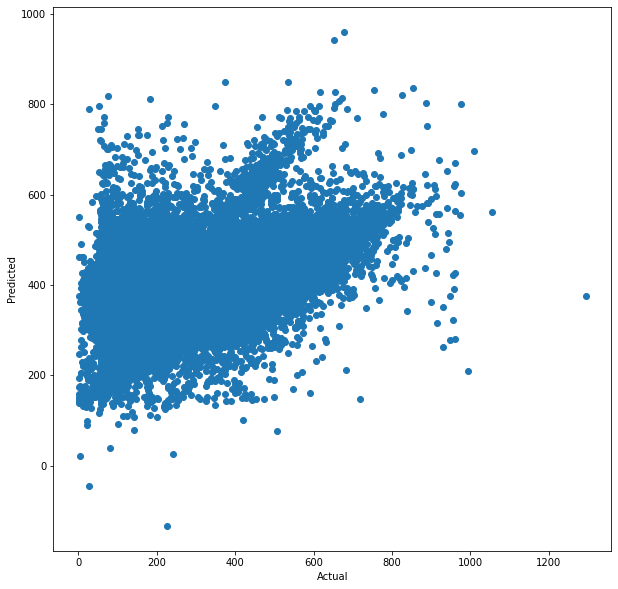

In [28]:
sleep_activity_temp = sleep_activity.dropna()
x = sleep_activity_temp[['minstofallasleep', 'minsafterwakeup', 'minsawake', 'sedentaryminutes', 'fairlyactiveminutes', 'lightlyactiveminutes', 'veryactiveminutes', 'steps']].values
y = sleep_activity_temp['minsasleep'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
ml = LinearRegression()
ml.fit(x_train, y_train)

y_pred = ml.predict(x_test)
print(r2_score(y_test, y_pred))

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

0.09278203456056844


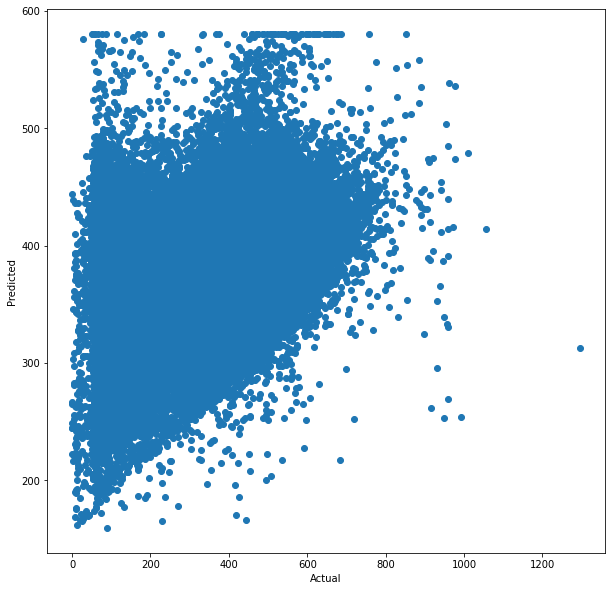

In [34]:
sleep_activity_temp = sleep_activity.dropna()
x = sleep_activity_temp[['sedentaryminutes']].values
y = sleep_activity_temp['minsasleep'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
ml = LinearRegression()
ml.fit(x_train, y_train)

y_pred = ml.predict(x_test)
print(r2_score(y_test, y_pred))

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [29]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
sleep_activity_temp = sleep_activity[['bedtimedur', 'minstofallasleep', 'minsafterwakeup', 'minsawake', 'sedentaryminutes', 'fairlyactiveminutes', 'lightlyactiveminutes', 'veryactiveminutes', 'steps']]
sleep_activity_temp = sleep_activity_temp.dropna()
chi_square_value, p_value = calculate_bartlett_sphericity(sleep_activity_temp)
chi_square_value, p_value

(900522.7755160542, 0.0)

In [31]:
from factor_analyzer.factor_analyzer import calculate_kmo
sleep_activity_temp = sleep_activity[['bedtimedur', 'minstofallasleep', 'minsafterwakeup', 'minsawake', 'sedentaryminutes', 'fairlyactiveminutes', 'lightlyactiveminutes', 'veryactiveminutes', 'steps']]
sleep_activity_temp = sleep_activity_temp.dropna()
kmo_all, kmo_model = calculate_kmo(sleep_activity_temp)
kmo_all, kmo_model

(array([0.42074093, 0.68905024, 0.5099496 , 0.56894743, 0.60609914,
        0.85857558, 0.3933568 , 0.51022993, 0.5838365 ]),
 0.5587527809665331)

In [32]:
from factor_analyzer import FactorAnalyzer
sleep_activity_temp = sleep_activity[['bedtimedur', 'minstofallasleep', 'minsafterwakeup', 'minsawake', 'sedentaryminutes', 'fairlyactiveminutes', 'lightlyactiveminutes', 'veryactiveminutes', 'steps']]
sleep_activity_temp = sleep_activity_temp.dropna()
fa = FactorAnalyzer(rotation=None)
fa.fit(sleep_activity_temp)
fa.get_eigenvalues()

(array([2.77611242, 1.63151199, 1.06402375, 0.99737989, 0.94538661,
        0.58882702, 0.50010343, 0.35949971, 0.13715516]),
 array([ 2.49712465,  1.00776971,  0.91325972,  0.303107  ,  0.05541678,
        -0.01234577, -0.02845556, -0.12536947, -0.19047875]))

In [33]:
fa.get_factor_variance()

(array([2.49724924, 1.01072468, 0.91205437]),
 array([0.27747214, 0.11230274, 0.10133937]),
 array([0.27747214, 0.38977488, 0.49111426]))